<a href="https://colab.research.google.com/github/Vini901/Supervised-Machine-Learning/blob/main/Copy_of_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set()

In [30]:
datafiles='/content/drive/MyDrive/bbc'

In [98]:
bbc=['business','entertainment','politics','sport','tech']

In [99]:
# get data file names

df=pd.DataFrame({'news':[]})


In [109]:
for i in bbc:
  local_path = r'/content/drive/MyDrive/bbc/'+i
  filenames = glob.glob(local_path + "/*.txt")
  for filename in filenames:
    print(filename)
    s=pd.read_csv(filename, sep='\t',header=None,names=['news'],encoding= 'unicode_escape',error_bad_lines=False,engine='python')
    df=pd.concat([df,s],axis=0)

/content/drive/MyDrive/bbc/business/003.txt
/content/drive/MyDrive/bbc/business/001.txt
/content/drive/MyDrive/bbc/business/002.txt
/content/drive/MyDrive/bbc/business/024.txt
/content/drive/MyDrive/bbc/business/004.txt
/content/drive/MyDrive/bbc/business/019.txt
/content/drive/MyDrive/bbc/business/025.txt
/content/drive/MyDrive/bbc/business/011.txt
/content/drive/MyDrive/bbc/business/012.txt
/content/drive/MyDrive/bbc/business/014.txt
/content/drive/MyDrive/bbc/business/021.txt
/content/drive/MyDrive/bbc/business/022.txt
/content/drive/MyDrive/bbc/business/017.txt
/content/drive/MyDrive/bbc/business/009.txt
/content/drive/MyDrive/bbc/business/028.txt
/content/drive/MyDrive/bbc/business/027.txt
/content/drive/MyDrive/bbc/business/016.txt
/content/drive/MyDrive/bbc/business/023.txt
/content/drive/MyDrive/bbc/business/006.txt
/content/drive/MyDrive/bbc/business/010.txt
/content/drive/MyDrive/bbc/business/018.txt
/content/drive/MyDrive/bbc/business/015.txt
/content/drive/MyDrive/bbc/busin

Skipping line 17: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/business/042.txt
/content/drive/MyDrive/bbc/business/038.txt
/content/drive/MyDrive/bbc/business/063.txt
/content/drive/MyDrive/bbc/business/032.txt
/content/drive/MyDrive/bbc/business/039.txt
/content/drive/MyDrive/bbc/business/053.txt
/content/drive/MyDrive/bbc/business/071.txt
/content/drive/MyDrive/bbc/business/031.txt
/content/drive/MyDrive/bbc/business/036.txt
/content/drive/MyDrive/bbc/business/072.txt
/content/drive/MyDrive/bbc/business/046.txt
/content/drive/MyDrive/bbc/business/054.txt
/content/drive/MyDrive/bbc/business/047.txt
/content/drive/MyDrive/bbc/business/052.txt
/content/drive/MyDrive/bbc/business/061.txt
/content/drive/MyDrive/bbc/business/037.txt
/content/drive/MyDrive/bbc/business/050.txt
/content/drive/MyDrive/bbc/business/041.txt
/content/drive/MyDrive/bbc/business/066.txt
/content/drive/MyDrive/bbc/business/043.txt
/content/drive/MyDrive/bbc/business/064.txt
/content/drive/MyDrive/bbc/business/059.txt
/content/drive/MyDrive/bbc/busin

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/business/048.txt
/content/drive/MyDrive/bbc/business/030.txt
/content/drive/MyDrive/bbc/business/049.txt
/content/drive/MyDrive/bbc/business/069.txt
/content/drive/MyDrive/bbc/business/073.txt
/content/drive/MyDrive/bbc/business/051.txt
/content/drive/MyDrive/bbc/business/045.txt
/content/drive/MyDrive/bbc/business/057.txt
/content/drive/MyDrive/bbc/business/062.txt
/content/drive/MyDrive/bbc/business/060.txt
/content/drive/MyDrive/bbc/business/077.txt
/content/drive/MyDrive/bbc/business/110.txt
/content/drive/MyDrive/bbc/business/092.txt
/content/drive/MyDrive/bbc/business/112.txt
/content/drive/MyDrive/bbc/business/097.txt
/content/drive/MyDrive/bbc/business/107.txt
/content/drive/MyDrive/bbc/business/078.txt
/content/drive/MyDrive/bbc/business/079.txt
/content/drive/MyDrive/bbc/business/081.txt
/content/drive/MyDrive/bbc/business/087.txt
/content/drive/MyDrive/bbc/business/084.txt
/content/drive/MyDrive/bbc/business/088.txt
/content/drive/MyDrive/bbc/busin

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/business/101.txt
/content/drive/MyDrive/bbc/business/082.txt
/content/drive/MyDrive/bbc/business/099.txt
/content/drive/MyDrive/bbc/business/075.txt
/content/drive/MyDrive/bbc/business/098.txt
/content/drive/MyDrive/bbc/business/085.txt
/content/drive/MyDrive/bbc/business/086.txt
/content/drive/MyDrive/bbc/business/109.txt
/content/drive/MyDrive/bbc/business/105.txt
/content/drive/MyDrive/bbc/business/089.txt
/content/drive/MyDrive/bbc/business/106.txt
/content/drive/MyDrive/bbc/business/094.txt
/content/drive/MyDrive/bbc/business/096.txt
/content/drive/MyDrive/bbc/business/091.txt
/content/drive/MyDrive/bbc/business/114.txt
/content/drive/MyDrive/bbc/business/083.txt
/content/drive/MyDrive/bbc/business/108.txt
/content/drive/MyDrive/bbc/business/115.txt
/content/drive/MyDrive/bbc/business/080.txt
/content/drive/MyDrive/bbc/business/090.txt
/content/drive/MyDrive/bbc/business/111.txt
/content/drive/MyDrive/bbc/business/103.txt
/content/drive/MyDrive/bbc/busin

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/business/153.txt
/content/drive/MyDrive/bbc/business/128.txt
/content/drive/MyDrive/bbc/business/118.txt
/content/drive/MyDrive/bbc/business/145.txt
/content/drive/MyDrive/bbc/business/150.txt
/content/drive/MyDrive/bbc/business/137.txt
/content/drive/MyDrive/bbc/business/152.txt
/content/drive/MyDrive/bbc/business/151.txt
/content/drive/MyDrive/bbc/business/134.txt
/content/drive/MyDrive/bbc/business/133.txt
/content/drive/MyDrive/bbc/business/140.txt
/content/drive/MyDrive/bbc/business/147.txt
/content/drive/MyDrive/bbc/business/129.txt
/content/drive/MyDrive/bbc/business/154.txt
/content/drive/MyDrive/bbc/business/139.txt
/content/drive/MyDrive/bbc/business/123.txt
/content/drive/MyDrive/bbc/business/120.txt
/content/drive/MyDrive/bbc/business/125.txt
/content/drive/MyDrive/bbc/business/130.txt
/content/drive/MyDrive/bbc/business/119.txt
/content/drive/MyDrive/bbc/business/146.txt
/content/drive/MyDrive/bbc/business/144.txt
/content/drive/MyDrive/bbc/busin

Skipping line 17: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/business/141.txt
/content/drive/MyDrive/bbc/business/155.txt
/content/drive/MyDrive/bbc/business/126.txt
/content/drive/MyDrive/bbc/business/116.txt
/content/drive/MyDrive/bbc/business/132.txt
/content/drive/MyDrive/bbc/business/138.txt
/content/drive/MyDrive/bbc/business/161.txt
/content/drive/MyDrive/bbc/business/185.txt
/content/drive/MyDrive/bbc/business/182.txt
/content/drive/MyDrive/bbc/business/181.txt
/content/drive/MyDrive/bbc/business/184.txt
/content/drive/MyDrive/bbc/business/196.txt
/content/drive/MyDrive/bbc/business/176.txt
/content/drive/MyDrive/bbc/business/167.txt
/content/drive/MyDrive/bbc/business/198.txt
/content/drive/MyDrive/bbc/business/188.txt
/content/drive/MyDrive/bbc/business/175.txt
/content/drive/MyDrive/bbc/business/195.txt
/content/drive/MyDrive/bbc/business/197.txt
/content/drive/MyDrive/bbc/business/170.txt
/content/drive/MyDrive/bbc/business/163.txt
/content/drive/MyDrive/bbc/business/168.txt
/content/drive/MyDrive/bbc/busin

Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/business/187.txt
/content/drive/MyDrive/bbc/business/162.txt
/content/drive/MyDrive/bbc/business/203.txt
/content/drive/MyDrive/bbc/business/193.txt
/content/drive/MyDrive/bbc/business/202.txt
/content/drive/MyDrive/bbc/business/191.txt
/content/drive/MyDrive/bbc/business/194.txt
/content/drive/MyDrive/bbc/business/183.txt
/content/drive/MyDrive/bbc/business/179.txt
/content/drive/MyDrive/bbc/business/200.txt
/content/drive/MyDrive/bbc/business/172.txt
/content/drive/MyDrive/bbc/business/178.txt
/content/drive/MyDrive/bbc/business/192.txt
/content/drive/MyDrive/bbc/business/173.txt
/content/drive/MyDrive/bbc/business/174.txt
/content/drive/MyDrive/bbc/business/199.txt
/content/drive/MyDrive/bbc/business/160.txt
/content/drive/MyDrive/bbc/business/218.txt
/content/drive/MyDrive/bbc/business/228.txt
/content/drive/MyDrive/bbc/business/231.txt
/content/drive/MyDrive/bbc/business/224.txt
/content/drive/MyDrive/bbc/business/210.txt
/content/drive/MyDrive/bbc/busin

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/business/242.txt
/content/drive/MyDrive/bbc/business/223.txt
/content/drive/MyDrive/bbc/business/208.txt
/content/drive/MyDrive/bbc/business/234.txt
/content/drive/MyDrive/bbc/business/243.txt
/content/drive/MyDrive/bbc/business/236.txt
/content/drive/MyDrive/bbc/business/217.txt
/content/drive/MyDrive/bbc/business/211.txt
/content/drive/MyDrive/bbc/business/215.txt
/content/drive/MyDrive/bbc/business/227.txt
/content/drive/MyDrive/bbc/business/213.txt
/content/drive/MyDrive/bbc/business/222.txt
/content/drive/MyDrive/bbc/business/206.txt
/content/drive/MyDrive/bbc/business/205.txt
/content/drive/MyDrive/bbc/business/238.txt
/content/drive/MyDrive/bbc/business/235.txt
/content/drive/MyDrive/bbc/business/233.txt
/content/drive/MyDrive/bbc/business/239.txt
/content/drive/MyDrive/bbc/business/241.txt
/content/drive/MyDrive/bbc/business/214.txt
/content/drive/MyDrive/bbc/business/204.txt
/content/drive/MyDrive/bbc/business/216.txt
/content/drive/MyDrive/bbc/busin

Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/business/275.txt
/content/drive/MyDrive/bbc/business/250.txt
/content/drive/MyDrive/bbc/business/264.txt
/content/drive/MyDrive/bbc/business/262.txt
/content/drive/MyDrive/bbc/business/287.txt
/content/drive/MyDrive/bbc/business/248.txt
/content/drive/MyDrive/bbc/business/272.txt
/content/drive/MyDrive/bbc/business/261.txt
/content/drive/MyDrive/bbc/business/286.txt
/content/drive/MyDrive/bbc/business/285.txt
/content/drive/MyDrive/bbc/business/284.txt
/content/drive/MyDrive/bbc/business/244.txt
/content/drive/MyDrive/bbc/business/260.txt
/content/drive/MyDrive/bbc/business/279.txt
/content/drive/MyDrive/bbc/business/252.txt
/content/drive/MyDrive/bbc/business/280.txt
/content/drive/MyDrive/bbc/business/278.txt
/content/drive/MyDrive/bbc/business/283.txt
/content/drive/MyDrive/bbc/business/276.txt
/content/drive/MyDrive/bbc/business/259.txt
/content/drive/MyDrive/bbc/business/247.txt
/content/drive/MyDrive/bbc/business/245.txt
/content/drive/MyDrive/bbc/busin

Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/business/316.txt
/content/drive/MyDrive/bbc/business/313.txt
/content/drive/MyDrive/bbc/business/318.txt
/content/drive/MyDrive/bbc/business/306.txt
/content/drive/MyDrive/bbc/business/296.txt
/content/drive/MyDrive/bbc/business/329.txt
/content/drive/MyDrive/bbc/business/321.txt
/content/drive/MyDrive/bbc/business/314.txt
/content/drive/MyDrive/bbc/business/327.txt
/content/drive/MyDrive/bbc/business/303.txt
/content/drive/MyDrive/bbc/business/301.txt
/content/drive/MyDrive/bbc/business/311.txt
/content/drive/MyDrive/bbc/business/317.txt
/content/drive/MyDrive/bbc/business/309.txt
/content/drive/MyDrive/bbc/business/319.txt
/content/drive/MyDrive/bbc/business/326.txt
/content/drive/MyDrive/bbc/business/307.txt
/content/drive/MyDrive/bbc/business/334.txt
/content/drive/MyDrive/bbc/business/340.txt
/content/drive/MyDrive/bbc/business/335.txt
/content/drive/MyDrive/bbc/business/346.txt
/content/drive/MyDrive/bbc/business/353.txt
/content/drive/MyDrive/bbc/busin

Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 19: '	' expected after '"'


/content/drive/MyDrive/bbc/business/370.txt
/content/drive/MyDrive/bbc/business/337.txt
/content/drive/MyDrive/bbc/business/342.txt
/content/drive/MyDrive/bbc/business/348.txt
/content/drive/MyDrive/bbc/business/332.txt
/content/drive/MyDrive/bbc/business/345.txt
/content/drive/MyDrive/bbc/business/364.txt
/content/drive/MyDrive/bbc/business/350.txt
/content/drive/MyDrive/bbc/business/366.txt
/content/drive/MyDrive/bbc/business/347.txt
/content/drive/MyDrive/bbc/business/360.txt
/content/drive/MyDrive/bbc/business/368.txt
/content/drive/MyDrive/bbc/business/343.txt
/content/drive/MyDrive/bbc/business/369.txt
/content/drive/MyDrive/bbc/business/344.txt
/content/drive/MyDrive/bbc/business/351.txt
/content/drive/MyDrive/bbc/business/357.txt
/content/drive/MyDrive/bbc/business/330.txt
/content/drive/MyDrive/bbc/business/363.txt
/content/drive/MyDrive/bbc/business/349.txt
/content/drive/MyDrive/bbc/business/374.txt
/content/drive/MyDrive/bbc/business/372.txt
/content/drive/MyDrive/bbc/busin

Skipping line 13: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/business/394.txt
/content/drive/MyDrive/bbc/business/382.txt
/content/drive/MyDrive/bbc/business/414.txt
/content/drive/MyDrive/bbc/business/404.txt
/content/drive/MyDrive/bbc/business/412.txt
/content/drive/MyDrive/bbc/business/417.txt
/content/drive/MyDrive/bbc/business/411.txt
/content/drive/MyDrive/bbc/business/381.txt
/content/drive/MyDrive/bbc/business/418.txt
/content/drive/MyDrive/bbc/business/403.txt
/content/drive/MyDrive/bbc/business/377.txt
/content/drive/MyDrive/bbc/business/391.txt
/content/drive/MyDrive/bbc/business/409.txt
/content/drive/MyDrive/bbc/business/402.txt
/content/drive/MyDrive/bbc/business/393.txt
/content/drive/MyDrive/bbc/business/385.txt
/content/drive/MyDrive/bbc/business/375.txt
/content/drive/MyDrive/bbc/business/390.txt
/content/drive/MyDrive/bbc/business/400.txt
/content/drive/MyDrive/bbc/business/384.txt
/content/drive/MyDrive/bbc/business/415.txt
/content/drive/MyDrive/bbc/business/388.txt
/content/drive/MyDrive/bbc/busin

Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/business/399.txt
/content/drive/MyDrive/bbc/business/383.txt
/content/drive/MyDrive/bbc/business/395.txt
/content/drive/MyDrive/bbc/business/380.txt
/content/drive/MyDrive/bbc/business/378.txt
/content/drive/MyDrive/bbc/business/396.txt
/content/drive/MyDrive/bbc/business/387.txt
/content/drive/MyDrive/bbc/business/397.txt
/content/drive/MyDrive/bbc/business/443.txt
/content/drive/MyDrive/bbc/business/445.txt
/content/drive/MyDrive/bbc/business/446.txt
/content/drive/MyDrive/bbc/business/442.txt
/content/drive/MyDrive/bbc/business/456.txt
/content/drive/MyDrive/bbc/business/433.txt
/content/drive/MyDrive/bbc/business/464.txt
/content/drive/MyDrive/bbc/business/437.txt
/content/drive/MyDrive/bbc/business/438.txt
/content/drive/MyDrive/bbc/business/447.txt
/content/drive/MyDrive/bbc/business/451.txt
/content/drive/MyDrive/bbc/business/444.txt
/content/drive/MyDrive/bbc/business/455.txt
/content/drive/MyDrive/bbc/business/432.txt
/content/drive/MyDrive/bbc/busin

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/business/441.txt
/content/drive/MyDrive/bbc/business/429.txt
/content/drive/MyDrive/bbc/business/450.txt
/content/drive/MyDrive/bbc/business/434.txt
/content/drive/MyDrive/bbc/business/462.txt
/content/drive/MyDrive/bbc/business/454.txt
/content/drive/MyDrive/bbc/business/460.txt
/content/drive/MyDrive/bbc/business/422.txt
/content/drive/MyDrive/bbc/business/448.txt
/content/drive/MyDrive/bbc/business/457.txt
/content/drive/MyDrive/bbc/business/425.txt
/content/drive/MyDrive/bbc/business/426.txt
/content/drive/MyDrive/bbc/business/458.txt
/content/drive/MyDrive/bbc/business/449.txt
/content/drive/MyDrive/bbc/business/431.txt
/content/drive/MyDrive/bbc/business/436.txt
/content/drive/MyDrive/bbc/business/421.txt
/content/drive/MyDrive/bbc/business/459.txt
/content/drive/MyDrive/bbc/business/453.txt
/content/drive/MyDrive/bbc/business/423.txt
/content/drive/MyDrive/bbc/business/489.txt
/content/drive/MyDrive/bbc/business/482.txt
/content/drive/MyDrive/bbc/busin

Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/business/467.txt
/content/drive/MyDrive/bbc/business/466.txt
/content/drive/MyDrive/bbc/business/501.txt
/content/drive/MyDrive/bbc/business/468.txt
/content/drive/MyDrive/bbc/business/477.txt
/content/drive/MyDrive/bbc/business/481.txt
/content/drive/MyDrive/bbc/business/497.txt
/content/drive/MyDrive/bbc/business/503.txt
/content/drive/MyDrive/bbc/business/474.txt
/content/drive/MyDrive/bbc/business/465.txt
/content/drive/MyDrive/bbc/business/502.txt
/content/drive/MyDrive/bbc/business/496.txt
/content/drive/MyDrive/bbc/business/473.txt
/content/drive/MyDrive/bbc/business/488.txt
/content/drive/MyDrive/bbc/business/471.txt
/content/drive/MyDrive/bbc/business/494.txt
/content/drive/MyDrive/bbc/business/487.txt
/content/drive/MyDrive/bbc/business/500.txt
/content/drive/MyDrive/bbc/business/479.txt
/content/drive/MyDrive/bbc/business/499.txt
/content/drive/MyDrive/bbc/business/484.txt
/content/drive/MyDrive/bbc/business/480.txt
/content/drive/MyDrive/bbc/busin

Skipping line 13: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/business/510.txt
/content/drive/MyDrive/bbc/business/506.txt
/content/drive/MyDrive/bbc/business/505.txt
/content/drive/MyDrive/bbc/business/507.txt
/content/drive/MyDrive/bbc/business/509.txt
/content/drive/MyDrive/bbc/business/504.txt
/content/drive/MyDrive/bbc/business/508.txt
/content/drive/MyDrive/bbc/entertainment/001.txt
/content/drive/MyDrive/bbc/entertainment/016.txt
/content/drive/MyDrive/bbc/entertainment/035.txt
/content/drive/MyDrive/bbc/entertainment/012.txt
/content/drive/MyDrive/bbc/entertainment/034.txt
/content/drive/MyDrive/bbc/entertainment/023.txt
/content/drive/MyDrive/bbc/entertainment/005.txt
/content/drive/MyDrive/bbc/entertainment/024.txt
/content/drive/MyDrive/bbc/entertainment/011.txt
/content/drive/MyDrive/bbc/entertainment/007.txt
/content/drive/MyDrive/bbc/entertainment/018.txt
/content/drive/MyDrive/bbc/entertainment/014.txt
/content/drive/MyDrive/bbc/entertainment/022.txt
/content/drive/MyDrive/bbc/entertainment/021.txt
/conte

Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/entertainment/013.txt
/content/drive/MyDrive/bbc/entertainment/006.txt
/content/drive/MyDrive/bbc/entertainment/003.txt
/content/drive/MyDrive/bbc/entertainment/015.txt
/content/drive/MyDrive/bbc/entertainment/038.txt
/content/drive/MyDrive/bbc/entertainment/019.txt
/content/drive/MyDrive/bbc/entertainment/036.txt
/content/drive/MyDrive/bbc/entertainment/026.txt
/content/drive/MyDrive/bbc/entertainment/010.txt
/content/drive/MyDrive/bbc/entertainment/002.txt
/content/drive/MyDrive/bbc/entertainment/028.txt
/content/drive/MyDrive/bbc/entertainment/037.txt
/content/drive/MyDrive/bbc/entertainment/031.txt
/content/drive/MyDrive/bbc/entertainment/040.txt
/content/drive/MyDrive/bbc/entertainment/039.txt
/content/drive/MyDrive/bbc/entertainment/004.txt
/content/drive/MyDrive/bbc/entertainment/025.txt
/content/drive/MyDrive/bbc/entertainment/029.txt
/content/drive/MyDrive/bbc/entertainment/030.txt
/content/drive/MyDrive/bbc/entertainment/017.txt
/content/drive/MyDri

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/entertainment/056.txt
/content/drive/MyDrive/bbc/entertainment/059.txt
/content/drive/MyDrive/bbc/entertainment/070.txt
/content/drive/MyDrive/bbc/entertainment/046.txt
/content/drive/MyDrive/bbc/entertainment/071.txt
/content/drive/MyDrive/bbc/entertainment/055.txt
/content/drive/MyDrive/bbc/entertainment/062.txt
/content/drive/MyDrive/bbc/entertainment/061.txt
/content/drive/MyDrive/bbc/entertainment/051.txt
/content/drive/MyDrive/bbc/entertainment/084.txt
/content/drive/MyDrive/bbc/entertainment/058.txt
/content/drive/MyDrive/bbc/entertainment/060.txt
/content/drive/MyDrive/bbc/entertainment/080.txt
/content/drive/MyDrive/bbc/entertainment/067.txt
/content/drive/MyDrive/bbc/entertainment/049.txt
/content/drive/MyDrive/bbc/entertainment/064.txt
/content/drive/MyDrive/bbc/entertainment/079.txt
/content/drive/MyDrive/bbc/entertainment/048.txt
/content/drive/MyDrive/bbc/entertainment/081.txt
/content/drive/MyDrive/bbc/entertainment/068.txt
/content/drive/MyDri

Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/entertainment/065.txt
/content/drive/MyDrive/bbc/entertainment/042.txt
/content/drive/MyDrive/bbc/entertainment/073.txt
/content/drive/MyDrive/bbc/entertainment/066.txt
/content/drive/MyDrive/bbc/entertainment/052.txt
/content/drive/MyDrive/bbc/entertainment/074.txt
/content/drive/MyDrive/bbc/entertainment/085.txt
/content/drive/MyDrive/bbc/entertainment/045.txt
/content/drive/MyDrive/bbc/entertainment/118.txt
/content/drive/MyDrive/bbc/entertainment/097.txt
/content/drive/MyDrive/bbc/entertainment/107.txt
/content/drive/MyDrive/bbc/entertainment/089.txt
/content/drive/MyDrive/bbc/entertainment/093.txt
/content/drive/MyDrive/bbc/entertainment/124.txt
/content/drive/MyDrive/bbc/entertainment/101.txt
/content/drive/MyDrive/bbc/entertainment/099.txt
/content/drive/MyDrive/bbc/entertainment/096.txt
/content/drive/MyDrive/bbc/entertainment/127.txt
/content/drive/MyDrive/bbc/entertainment/122.txt
/content/drive/MyDrive/bbc/entertainment/129.txt
/content/drive/MyDri

Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/entertainment/167.txt
/content/drive/MyDrive/bbc/entertainment/156.txt
/content/drive/MyDrive/bbc/entertainment/162.txt
/content/drive/MyDrive/bbc/entertainment/146.txt
/content/drive/MyDrive/bbc/entertainment/138.txt
/content/drive/MyDrive/bbc/entertainment/153.txt
/content/drive/MyDrive/bbc/entertainment/132.txt
/content/drive/MyDrive/bbc/entertainment/164.txt
/content/drive/MyDrive/bbc/entertainment/148.txt
/content/drive/MyDrive/bbc/entertainment/159.txt
/content/drive/MyDrive/bbc/entertainment/150.txt
/content/drive/MyDrive/bbc/entertainment/160.txt
/content/drive/MyDrive/bbc/entertainment/163.txt
/content/drive/MyDrive/bbc/entertainment/137.txt
/content/drive/MyDrive/bbc/entertainment/145.txt
/content/drive/MyDrive/bbc/entertainment/136.txt
/content/drive/MyDrive/bbc/entertainment/169.txt
/content/drive/MyDrive/bbc/entertainment/135.txt
/content/drive/MyDrive/bbc/entertainment/134.txt
/content/drive/MyDrive/bbc/entertainment/131.txt
/content/drive/MyDri

Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'



/content/drive/MyDrive/bbc/entertainment/179.txt
/content/drive/MyDrive/bbc/entertainment/183.txt
/content/drive/MyDrive/bbc/entertainment/175.txt
/content/drive/MyDrive/bbc/entertainment/206.txt
/content/drive/MyDrive/bbc/entertainment/192.txt
/content/drive/MyDrive/bbc/entertainment/217.txt
/content/drive/MyDrive/bbc/entertainment/218.txt
/content/drive/MyDrive/bbc/entertainment/208.txt
/content/drive/MyDrive/bbc/entertainment/200.txt
/content/drive/MyDrive/bbc/entertainment/202.txt
/content/drive/MyDrive/bbc/entertainment/216.txt
/content/drive/MyDrive/bbc/entertainment/198.txt
/content/drive/MyDrive/bbc/entertainment/195.txt
/content/drive/MyDrive/bbc/entertainment/196.txt
/content/drive/MyDrive/bbc/entertainment/178.txt
/content/drive/MyDrive/bbc/entertainment/176.txt
/content/drive/MyDrive/bbc/entertainment/181.txt
/content/drive/MyDrive/bbc/entertainment/180.txt
/content/drive/MyDrive/bbc/entertainment/203.txt
/content/drive/MyDrive/bbc/entertainment/187.txt
/content/drive/MyDr

Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 77: '	' expected after '"'


/content/drive/MyDrive/bbc/entertainment/184.txt
/content/drive/MyDrive/bbc/entertainment/209.txt
/content/drive/MyDrive/bbc/entertainment/191.txt
/content/drive/MyDrive/bbc/entertainment/194.txt
/content/drive/MyDrive/bbc/entertainment/185.txt
/content/drive/MyDrive/bbc/entertainment/193.txt
/content/drive/MyDrive/bbc/entertainment/199.txt
/content/drive/MyDrive/bbc/entertainment/174.txt
/content/drive/MyDrive/bbc/entertainment/205.txt
/content/drive/MyDrive/bbc/entertainment/188.txt
/content/drive/MyDrive/bbc/entertainment/252.txt
/content/drive/MyDrive/bbc/entertainment/258.txt
/content/drive/MyDrive/bbc/entertainment/244.txt
/content/drive/MyDrive/bbc/entertainment/220.txt
/content/drive/MyDrive/bbc/entertainment/221.txt
/content/drive/MyDrive/bbc/entertainment/251.txt
/content/drive/MyDrive/bbc/entertainment/243.txt
/content/drive/MyDrive/bbc/entertainment/222.txt
/content/drive/MyDrive/bbc/entertainment/256.txt
/content/drive/MyDrive/bbc/entertainment/254.txt
/content/drive/MyDri

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/entertainment/226.txt
/content/drive/MyDrive/bbc/entertainment/250.txt
/content/drive/MyDrive/bbc/entertainment/225.txt
/content/drive/MyDrive/bbc/entertainment/257.txt
/content/drive/MyDrive/bbc/entertainment/246.txt
/content/drive/MyDrive/bbc/entertainment/227.txt
/content/drive/MyDrive/bbc/entertainment/238.txt
/content/drive/MyDrive/bbc/entertainment/235.txt
/content/drive/MyDrive/bbc/entertainment/249.txt
/content/drive/MyDrive/bbc/entertainment/223.txt
/content/drive/MyDrive/bbc/entertainment/253.txt
/content/drive/MyDrive/bbc/entertainment/242.txt
/content/drive/MyDrive/bbc/entertainment/237.txt
/content/drive/MyDrive/bbc/entertainment/236.txt
/content/drive/MyDrive/bbc/entertainment/219.txt
/content/drive/MyDrive/bbc/entertainment/232.txt
/content/drive/MyDrive/bbc/entertainment/262.txt
/content/drive/MyDrive/bbc/entertainment/240.txt
/content/drive/MyDrive/bbc/entertainment/260.txt
/content/drive/MyDrive/bbc/entertainment/248.txt
/content/drive/MyDri

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/entertainment/305.txt
/content/drive/MyDrive/bbc/entertainment/303.txt
/content/drive/MyDrive/bbc/entertainment/265.txt
/content/drive/MyDrive/bbc/entertainment/273.txt
/content/drive/MyDrive/bbc/entertainment/300.txt
/content/drive/MyDrive/bbc/entertainment/291.txt
/content/drive/MyDrive/bbc/entertainment/285.txt
/content/drive/MyDrive/bbc/entertainment/269.txt
/content/drive/MyDrive/bbc/entertainment/282.txt
/content/drive/MyDrive/bbc/entertainment/272.txt
/content/drive/MyDrive/bbc/entertainment/293.txt
/content/drive/MyDrive/bbc/entertainment/287.txt
/content/drive/MyDrive/bbc/entertainment/296.txt
/content/drive/MyDrive/bbc/entertainment/267.txt
/content/drive/MyDrive/bbc/entertainment/298.txt
/content/drive/MyDrive/bbc/entertainment/292.txt
/content/drive/MyDrive/bbc/entertainment/302.txt
/content/drive/MyDrive/bbc/entertainment/286.txt
/content/drive/MyDrive/bbc/entertainment/294.txt
/content/drive/MyDrive/bbc/entertainment/270.txt
/content/drive/MyDri

Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/entertainment/277.txt
/content/drive/MyDrive/bbc/entertainment/288.txt
/content/drive/MyDrive/bbc/entertainment/268.txt
/content/drive/MyDrive/bbc/entertainment/304.txt
/content/drive/MyDrive/bbc/entertainment/307.txt
/content/drive/MyDrive/bbc/entertainment/289.txt
/content/drive/MyDrive/bbc/entertainment/301.txt
/content/drive/MyDrive/bbc/entertainment/276.txt
/content/drive/MyDrive/bbc/entertainment/280.txt
/content/drive/MyDrive/bbc/entertainment/327.txt
/content/drive/MyDrive/bbc/entertainment/331.txt
/content/drive/MyDrive/bbc/entertainment/339.txt
/content/drive/MyDrive/bbc/entertainment/326.txt
/content/drive/MyDrive/bbc/entertainment/314.txt
/content/drive/MyDrive/bbc/entertainment/318.txt
/content/drive/MyDrive/bbc/entertainment/310.txt
/content/drive/MyDrive/bbc/entertainment/336.txt
/content/drive/MyDrive/bbc/entertainment/344.txt
/content/drive/MyDrive/bbc/entertainment/347.txt
/content/drive/MyDrive/bbc/entertainment/320.txt
/content/drive/MyDri

Skipping line 13: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/entertainment/338.txt
/content/drive/MyDrive/bbc/entertainment/325.txt
/content/drive/MyDrive/bbc/entertainment/334.txt
/content/drive/MyDrive/bbc/entertainment/311.txt
/content/drive/MyDrive/bbc/entertainment/317.txt
/content/drive/MyDrive/bbc/entertainment/346.txt
/content/drive/MyDrive/bbc/entertainment/328.txt
/content/drive/MyDrive/bbc/entertainment/350.txt
/content/drive/MyDrive/bbc/entertainment/323.txt
/content/drive/MyDrive/bbc/entertainment/348.txt
/content/drive/MyDrive/bbc/entertainment/333.txt
/content/drive/MyDrive/bbc/entertainment/351.txt
/content/drive/MyDrive/bbc/entertainment/349.txt
/content/drive/MyDrive/bbc/entertainment/343.txt
/content/drive/MyDrive/bbc/entertainment/341.txt
/content/drive/MyDrive/bbc/entertainment/309.txt
/content/drive/MyDrive/bbc/entertainment/324.txt
/content/drive/MyDrive/bbc/entertainment/319.txt
/content/drive/MyDrive/bbc/entertainment/315.txt
/content/drive/MyDrive/bbc/entertainment/322.txt
/content/drive/MyDri

Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/011.txt
/content/drive/MyDrive/bbc/politics/005.txt
/content/drive/MyDrive/bbc/politics/001.txt
/content/drive/MyDrive/bbc/politics/008.txt
/content/drive/MyDrive/bbc/politics/012.txt
/content/drive/MyDrive/bbc/politics/009.txt
/content/drive/MyDrive/bbc/politics/013.txt
/content/drive/MyDrive/bbc/politics/006.txt
/content/drive/MyDrive/bbc/politics/010.txt
/content/drive/MyDrive/bbc/politics/057.txt
/content/drive/MyDrive/bbc/politics/028.txt
/content/drive/MyDrive/bbc/politics/022.txt
/content/drive/MyDrive/bbc/politics/032.txt
/content/drive/MyDrive/bbc/politics/045.txt
/content/drive/MyDrive/bbc/politics/024.txt
/content/drive/MyDrive/bbc/politics/046.txt
/content/drive/MyDrive/bbc/politics/054.txt
/content/drive/MyDrive/bbc/politics/059.txt
/content/drive/MyDrive/bbc/politics/047.txt
/content/drive/MyDrive/bbc/politics/036.txt
/content/drive/MyDrive/bbc/politics/031.txt
/content/drive/MyDrive/bbc/politics/030.txt
/content/drive/MyDrive/bbc/polit

Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/040.txt
/content/drive/MyDrive/bbc/politics/025.txt
/content/drive/MyDrive/bbc/politics/027.txt
/content/drive/MyDrive/bbc/politics/049.txt
/content/drive/MyDrive/bbc/politics/048.txt
/content/drive/MyDrive/bbc/politics/058.txt
/content/drive/MyDrive/bbc/politics/026.txt
/content/drive/MyDrive/bbc/politics/015.txt
/content/drive/MyDrive/bbc/politics/038.txt
/content/drive/MyDrive/bbc/politics/051.txt
/content/drive/MyDrive/bbc/politics/033.txt
/content/drive/MyDrive/bbc/politics/034.txt
/content/drive/MyDrive/bbc/politics/056.txt
/content/drive/MyDrive/bbc/politics/018.txt
/content/drive/MyDrive/bbc/politics/043.txt
/content/drive/MyDrive/bbc/politics/021.txt
/content/drive/MyDrive/bbc/politics/017.txt
/content/drive/MyDrive/bbc/politics/050.txt
/content/drive/MyDrive/bbc/politics/039.txt
/content/drive/MyDrive/bbc/politics/055.txt
/content/drive/MyDrive/bbc/politics/020.txt
/content/drive/MyDrive/bbc/politics/035.txt
/content/drive/MyDrive/bbc/polit

Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 22: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/093.txt
/content/drive/MyDrive/bbc/politics/076.txt
/content/drive/MyDrive/bbc/politics/082.txt
/content/drive/MyDrive/bbc/politics/088.txt
/content/drive/MyDrive/bbc/politics/092.txt
/content/drive/MyDrive/bbc/politics/089.txt
/content/drive/MyDrive/bbc/politics/079.txt
/content/drive/MyDrive/bbc/politics/067.txt
/content/drive/MyDrive/bbc/politics/081.txt
/content/drive/MyDrive/bbc/politics/080.txt
/content/drive/MyDrive/bbc/politics/069.txt
/content/drive/MyDrive/bbc/politics/062.txt
/content/drive/MyDrive/bbc/politics/065.txt
/content/drive/MyDrive/bbc/politics/068.txt
/content/drive/MyDrive/bbc/politics/078.txt
/content/drive/MyDrive/bbc/politics/075.txt
/content/drive/MyDrive/bbc/politics/063.txt
/content/drive/MyDrive/bbc/politics/085.txt
/content/drive/MyDrive/bbc/politics/084.txt
/content/drive/MyDrive/bbc/politics/064.txt
/content/drive/MyDrive/bbc/politics/074.txt
/content/drive/MyDrive/bbc/politics/091.txt
/content/drive/MyDrive/bbc/polit

Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/107.txt
/content/drive/MyDrive/bbc/politics/130.txt
/content/drive/MyDrive/bbc/politics/132.txt
/content/drive/MyDrive/bbc/politics/127.txt
/content/drive/MyDrive/bbc/politics/125.txt
/content/drive/MyDrive/bbc/politics/136.txt
/content/drive/MyDrive/bbc/politics/112.txt
/content/drive/MyDrive/bbc/politics/108.txt
/content/drive/MyDrive/bbc/politics/122.txt
/content/drive/MyDrive/bbc/politics/102.txt
/content/drive/MyDrive/bbc/politics/149.txt
/content/drive/MyDrive/bbc/politics/159.txt
/content/drive/MyDrive/bbc/politics/173.txt
/content/drive/MyDrive/bbc/politics/185.txt
/content/drive/MyDrive/bbc/politics/179.txt
/content/drive/MyDrive/bbc/politics/180.txt
/content/drive/MyDrive/bbc/politics/155.txt
/content/drive/MyDrive/bbc/politics/181.txt
/content/drive/MyDrive/bbc/politics/162.txt
/content/drive/MyDrive/bbc/politics/167.txt
/content/drive/MyDrive/bbc/politics/156.txt
/content/drive/MyDrive/bbc/politics/183.txt
/content/drive/MyDrive/bbc/polit

Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/170.txt
/content/drive/MyDrive/bbc/politics/147.txt
/content/drive/MyDrive/bbc/politics/178.txt
/content/drive/MyDrive/bbc/politics/144.txt
/content/drive/MyDrive/bbc/politics/146.txt
/content/drive/MyDrive/bbc/politics/154.txt
/content/drive/MyDrive/bbc/politics/169.txt
/content/drive/MyDrive/bbc/politics/166.txt
/content/drive/MyDrive/bbc/politics/151.txt
/content/drive/MyDrive/bbc/politics/188.txt
/content/drive/MyDrive/bbc/politics/182.txt
/content/drive/MyDrive/bbc/politics/143.txt
/content/drive/MyDrive/bbc/politics/184.txt
/content/drive/MyDrive/bbc/politics/168.txt
/content/drive/MyDrive/bbc/politics/148.txt
/content/drive/MyDrive/bbc/politics/150.txt
/content/drive/MyDrive/bbc/politics/165.txt
/content/drive/MyDrive/bbc/politics/152.txt
/content/drive/MyDrive/bbc/politics/160.txt
/content/drive/MyDrive/bbc/politics/174.txt
/content/drive/MyDrive/bbc/politics/163.txt
/content/drive/MyDrive/bbc/politics/176.txt
/content/drive/MyDrive/bbc/polit

Skipping line 7: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/171.txt
/content/drive/MyDrive/bbc/politics/225.txt
/content/drive/MyDrive/bbc/politics/226.txt
/content/drive/MyDrive/bbc/politics/207.txt
/content/drive/MyDrive/bbc/politics/199.txt
/content/drive/MyDrive/bbc/politics/200.txt
/content/drive/MyDrive/bbc/politics/221.txt
/content/drive/MyDrive/bbc/politics/208.txt
/content/drive/MyDrive/bbc/politics/197.txt
/content/drive/MyDrive/bbc/politics/192.txt
/content/drive/MyDrive/bbc/politics/209.txt
/content/drive/MyDrive/bbc/politics/204.txt
/content/drive/MyDrive/bbc/politics/206.txt
/content/drive/MyDrive/bbc/politics/201.txt
/content/drive/MyDrive/bbc/politics/223.txt
/content/drive/MyDrive/bbc/politics/194.txt
/content/drive/MyDrive/bbc/politics/202.txt
/content/drive/MyDrive/bbc/politics/195.txt
/content/drive/MyDrive/bbc/politics/193.txt
/content/drive/MyDrive/bbc/politics/215.txt
/content/drive/MyDrive/bbc/politics/219.txt
/content/drive/MyDrive/bbc/politics/191.txt
/content/drive/MyDrive/bbc/polit

Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/205.txt
/content/drive/MyDrive/bbc/politics/218.txt
/content/drive/MyDrive/bbc/politics/217.txt
/content/drive/MyDrive/bbc/politics/216.txt
/content/drive/MyDrive/bbc/politics/211.txt
/content/drive/MyDrive/bbc/politics/213.txt
/content/drive/MyDrive/bbc/politics/214.txt
/content/drive/MyDrive/bbc/politics/250.txt
/content/drive/MyDrive/bbc/politics/246.txt
/content/drive/MyDrive/bbc/politics/253.txt
/content/drive/MyDrive/bbc/politics/254.txt
/content/drive/MyDrive/bbc/politics/267.txt
/content/drive/MyDrive/bbc/politics/227.txt
/content/drive/MyDrive/bbc/politics/241.txt
/content/drive/MyDrive/bbc/politics/263.txt
/content/drive/MyDrive/bbc/politics/240.txt
/content/drive/MyDrive/bbc/politics/235.txt
/content/drive/MyDrive/bbc/politics/232.txt
/content/drive/MyDrive/bbc/politics/257.txt
/content/drive/MyDrive/bbc/politics/237.txt
/content/drive/MyDrive/bbc/politics/231.txt
/content/drive/MyDrive/bbc/politics/248.txt
/content/drive/MyDrive/bbc/polit

Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/251.txt
/content/drive/MyDrive/bbc/politics/269.txt
/content/drive/MyDrive/bbc/politics/229.txt
/content/drive/MyDrive/bbc/politics/243.txt
/content/drive/MyDrive/bbc/politics/270.txt
/content/drive/MyDrive/bbc/politics/262.txt
/content/drive/MyDrive/bbc/politics/228.txt
/content/drive/MyDrive/bbc/politics/242.txt
/content/drive/MyDrive/bbc/politics/249.txt
/content/drive/MyDrive/bbc/politics/236.txt
/content/drive/MyDrive/bbc/politics/271.txt
/content/drive/MyDrive/bbc/politics/255.txt
/content/drive/MyDrive/bbc/politics/265.txt
/content/drive/MyDrive/bbc/politics/244.txt
/content/drive/MyDrive/bbc/politics/245.txt
/content/drive/MyDrive/bbc/politics/238.txt
/content/drive/MyDrive/bbc/politics/268.txt
/content/drive/MyDrive/bbc/politics/258.txt
/content/drive/MyDrive/bbc/politics/230.txt
/content/drive/MyDrive/bbc/politics/261.txt
/content/drive/MyDrive/bbc/politics/259.txt
/content/drive/MyDrive/bbc/politics/256.txt
/content/drive/MyDrive/bbc/polit

Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/288.txt
/content/drive/MyDrive/bbc/politics/313.txt
/content/drive/MyDrive/bbc/politics/289.txt
/content/drive/MyDrive/bbc/politics/290.txt
/content/drive/MyDrive/bbc/politics/311.txt
/content/drive/MyDrive/bbc/politics/315.txt
/content/drive/MyDrive/bbc/politics/302.txt
/content/drive/MyDrive/bbc/politics/299.txt
/content/drive/MyDrive/bbc/politics/273.txt
/content/drive/MyDrive/bbc/politics/278.txt
/content/drive/MyDrive/bbc/politics/309.txt
/content/drive/MyDrive/bbc/politics/276.txt
/content/drive/MyDrive/bbc/politics/316.txt
/content/drive/MyDrive/bbc/politics/305.txt
/content/drive/MyDrive/bbc/politics/292.txt
/content/drive/MyDrive/bbc/politics/307.txt
/content/drive/MyDrive/bbc/politics/296.txt
/content/drive/MyDrive/bbc/politics/294.txt
/content/drive/MyDrive/bbc/politics/287.txt
/content/drive/MyDrive/bbc/politics/275.txt
/content/drive/MyDrive/bbc/politics/297.txt
/content/drive/MyDrive/bbc/politics/304.txt
/content/drive/MyDrive/bbc/polit

Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/295.txt
/content/drive/MyDrive/bbc/politics/293.txt
/content/drive/MyDrive/bbc/politics/303.txt
/content/drive/MyDrive/bbc/politics/286.txt
/content/drive/MyDrive/bbc/politics/306.txt
/content/drive/MyDrive/bbc/politics/282.txt
/content/drive/MyDrive/bbc/politics/284.txt
/content/drive/MyDrive/bbc/politics/317.txt
/content/drive/MyDrive/bbc/politics/314.txt
/content/drive/MyDrive/bbc/politics/331.txt
/content/drive/MyDrive/bbc/politics/336.txt
/content/drive/MyDrive/bbc/politics/355.txt
/content/drive/MyDrive/bbc/politics/348.txt
/content/drive/MyDrive/bbc/politics/334.txt
/content/drive/MyDrive/bbc/politics/338.txt
/content/drive/MyDrive/bbc/politics/324.txt
/content/drive/MyDrive/bbc/politics/362.txt
/content/drive/MyDrive/bbc/politics/359.txt
/content/drive/MyDrive/bbc/politics/325.txt
/content/drive/MyDrive/bbc/politics/327.txt
/content/drive/MyDrive/bbc/politics/341.txt
/content/drive/MyDrive/bbc/politics/354.txt
/content/drive/MyDrive/bbc/polit

Skipping line 13: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/323.txt
/content/drive/MyDrive/bbc/politics/335.txt
/content/drive/MyDrive/bbc/politics/352.txt
/content/drive/MyDrive/bbc/politics/329.txt
/content/drive/MyDrive/bbc/politics/356.txt
/content/drive/MyDrive/bbc/politics/357.txt
/content/drive/MyDrive/bbc/politics/322.txt
/content/drive/MyDrive/bbc/politics/358.txt
/content/drive/MyDrive/bbc/politics/339.txt
/content/drive/MyDrive/bbc/politics/320.txt
/content/drive/MyDrive/bbc/politics/344.txt
/content/drive/MyDrive/bbc/politics/328.txt
/content/drive/MyDrive/bbc/politics/318.txt
/content/drive/MyDrive/bbc/politics/333.txt
/content/drive/MyDrive/bbc/politics/319.txt
/content/drive/MyDrive/bbc/politics/349.txt
/content/drive/MyDrive/bbc/politics/330.txt
/content/drive/MyDrive/bbc/politics/321.txt
/content/drive/MyDrive/bbc/politics/332.txt
/content/drive/MyDrive/bbc/politics/346.txt
/content/drive/MyDrive/bbc/politics/347.txt
/content/drive/MyDrive/bbc/politics/350.txt
/content/drive/MyDrive/bbc/polit

Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/378.txt
/content/drive/MyDrive/bbc/politics/396.txt
/content/drive/MyDrive/bbc/politics/382.txt
/content/drive/MyDrive/bbc/politics/405.txt
/content/drive/MyDrive/bbc/politics/380.txt
/content/drive/MyDrive/bbc/politics/366.txt
/content/drive/MyDrive/bbc/politics/386.txt
/content/drive/MyDrive/bbc/politics/406.txt
/content/drive/MyDrive/bbc/politics/374.txt
/content/drive/MyDrive/bbc/politics/387.txt
/content/drive/MyDrive/bbc/politics/383.txt
/content/drive/MyDrive/bbc/politics/367.txt
/content/drive/MyDrive/bbc/politics/400.txt
/content/drive/MyDrive/bbc/politics/404.txt
/content/drive/MyDrive/bbc/politics/398.txt
/content/drive/MyDrive/bbc/politics/365.txt
/content/drive/MyDrive/bbc/politics/403.txt
/content/drive/MyDrive/bbc/politics/363.txt
/content/drive/MyDrive/bbc/politics/368.txt
/content/drive/MyDrive/bbc/politics/370.txt
/content/drive/MyDrive/bbc/politics/379.txt
/content/drive/MyDrive/bbc/politics/397.txt
/content/drive/MyDrive/bbc/polit

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/politics/364.txt
/content/drive/MyDrive/bbc/politics/390.txt
/content/drive/MyDrive/bbc/politics/399.txt
/content/drive/MyDrive/bbc/politics/377.txt
/content/drive/MyDrive/bbc/politics/401.txt
/content/drive/MyDrive/bbc/politics/389.txt
/content/drive/MyDrive/bbc/politics/393.txt
/content/drive/MyDrive/bbc/politics/381.txt
/content/drive/MyDrive/bbc/politics/369.txt
/content/drive/MyDrive/bbc/politics/372.txt
/content/drive/MyDrive/bbc/politics/408.txt
/content/drive/MyDrive/bbc/politics/417.txt
/content/drive/MyDrive/bbc/politics/413.txt
/content/drive/MyDrive/bbc/politics/416.txt
/content/drive/MyDrive/bbc/politics/411.txt
/content/drive/MyDrive/bbc/politics/414.txt
/content/drive/MyDrive/bbc/politics/409.txt
/content/drive/MyDrive/bbc/politics/410.txt
/content/drive/MyDrive/bbc/politics/415.txt
/content/drive/MyDrive/bbc/politics/412.txt
/content/drive/MyDrive/bbc/politics/407.txt
/content/drive/MyDrive/bbc/sport/005.txt
/content/drive/MyDrive/bbc/sport/03

Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/035.txt
/content/drive/MyDrive/bbc/sport/023.txt
/content/drive/MyDrive/bbc/sport/011.txt
/content/drive/MyDrive/bbc/sport/012.txt
/content/drive/MyDrive/bbc/sport/033.txt
/content/drive/MyDrive/bbc/sport/024.txt
/content/drive/MyDrive/bbc/sport/032.txt
/content/drive/MyDrive/bbc/sport/010.txt
/content/drive/MyDrive/bbc/sport/029.txt
/content/drive/MyDrive/bbc/sport/006.txt
/content/drive/MyDrive/bbc/sport/031.txt
/content/drive/MyDrive/bbc/sport/026.txt
/content/drive/MyDrive/bbc/sport/020.txt
/content/drive/MyDrive/bbc/sport/016.txt
/content/drive/MyDrive/bbc/sport/004.txt
/content/drive/MyDrive/bbc/sport/002.txt
/content/drive/MyDrive/bbc/sport/007.txt
/content/drive/MyDrive/bbc/sport/021.txt
/content/drive/MyDrive/bbc/sport/001.txt
/content/drive/MyDrive/bbc/sport/017.txt
/content/drive/MyDrive/bbc/sport/022.txt
/content/drive/MyDrive/bbc/sport/019.txt
/content/drive/MyDrive/bbc/sport/034.txt
/content/drive/MyDrive/bbc/sport/015.txt
/content/drive/M

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/065.txt
/content/drive/MyDrive/bbc/sport/061.txt
/content/drive/MyDrive/bbc/sport/071.txt
/content/drive/MyDrive/bbc/sport/041.txt
/content/drive/MyDrive/bbc/sport/057.txt
/content/drive/MyDrive/bbc/sport/048.txt
/content/drive/MyDrive/bbc/sport/046.txt
/content/drive/MyDrive/bbc/sport/076.txt
/content/drive/MyDrive/bbc/sport/056.txt
/content/drive/MyDrive/bbc/sport/038.txt
/content/drive/MyDrive/bbc/sport/047.txt
/content/drive/MyDrive/bbc/sport/053.txt
/content/drive/MyDrive/bbc/sport/078.txt
/content/drive/MyDrive/bbc/sport/037.txt
/content/drive/MyDrive/bbc/sport/066.txt
/content/drive/MyDrive/bbc/sport/045.txt
/content/drive/MyDrive/bbc/sport/040.txt
/content/drive/MyDrive/bbc/sport/080.txt
/content/drive/MyDrive/bbc/sport/077.txt
/content/drive/MyDrive/bbc/sport/096.txt
/content/drive/MyDrive/bbc/sport/122.txt
/content/drive/MyDrive/bbc/sport/086.txt
/content/drive/MyDrive/bbc/sport/083.txt
/content/drive/MyDrive/bbc/sport/105.txt
/content/drive/M

Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/119.txt
/content/drive/MyDrive/bbc/sport/107.txt
/content/drive/MyDrive/bbc/sport/112.txt
/content/drive/MyDrive/bbc/sport/091.txt
/content/drive/MyDrive/bbc/sport/085.txt
/content/drive/MyDrive/bbc/sport/114.txt
/content/drive/MyDrive/bbc/sport/113.txt
/content/drive/MyDrive/bbc/sport/082.txt
/content/drive/MyDrive/bbc/sport/116.txt
/content/drive/MyDrive/bbc/sport/117.txt
/content/drive/MyDrive/bbc/sport/101.txt
/content/drive/MyDrive/bbc/sport/095.txt
/content/drive/MyDrive/bbc/sport/111.txt
/content/drive/MyDrive/bbc/sport/084.txt
/content/drive/MyDrive/bbc/sport/124.txt
/content/drive/MyDrive/bbc/sport/110.txt
/content/drive/MyDrive/bbc/sport/098.txt
/content/drive/MyDrive/bbc/sport/127.txt
/content/drive/MyDrive/bbc/sport/089.txt
/content/drive/MyDrive/bbc/sport/123.txt
/content/drive/MyDrive/bbc/sport/104.txt
/content/drive/MyDrive/bbc/sport/094.txt
/content/drive/MyDrive/bbc/sport/090.txt
/content/drive/MyDrive/bbc/sport/125.txt
/content/drive/M

Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/121.txt
/content/drive/MyDrive/bbc/sport/115.txt
/content/drive/MyDrive/bbc/sport/103.txt
/content/drive/MyDrive/bbc/sport/092.txt
/content/drive/MyDrive/bbc/sport/120.txt
/content/drive/MyDrive/bbc/sport/109.txt
/content/drive/MyDrive/bbc/sport/106.txt
/content/drive/MyDrive/bbc/sport/100.txt
/content/drive/MyDrive/bbc/sport/171.txt
/content/drive/MyDrive/bbc/sport/128.txt
/content/drive/MyDrive/bbc/sport/166.txt
/content/drive/MyDrive/bbc/sport/151.txt
/content/drive/MyDrive/bbc/sport/170.txt
/content/drive/MyDrive/bbc/sport/131.txt
/content/drive/MyDrive/bbc/sport/139.txt
/content/drive/MyDrive/bbc/sport/135.txt
/content/drive/MyDrive/bbc/sport/144.txt
/content/drive/MyDrive/bbc/sport/133.txt
/content/drive/MyDrive/bbc/sport/129.txt
/content/drive/MyDrive/bbc/sport/167.txt
/content/drive/MyDrive/bbc/sport/137.txt
/content/drive/MyDrive/bbc/sport/156.txt
/content/drive/MyDrive/bbc/sport/138.txt
/content/drive/MyDrive/bbc/sport/147.txt
/content/drive/M

Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/168.txt
/content/drive/MyDrive/bbc/sport/132.txt
/content/drive/MyDrive/bbc/sport/161.txt
/content/drive/MyDrive/bbc/sport/150.txt
/content/drive/MyDrive/bbc/sport/152.txt
/content/drive/MyDrive/bbc/sport/134.txt
/content/drive/MyDrive/bbc/sport/149.txt
/content/drive/MyDrive/bbc/sport/145.txt
/content/drive/MyDrive/bbc/sport/159.txt
/content/drive/MyDrive/bbc/sport/155.txt
/content/drive/MyDrive/bbc/sport/141.txt
/content/drive/MyDrive/bbc/sport/146.txt
/content/drive/MyDrive/bbc/sport/163.txt
/content/drive/MyDrive/bbc/sport/169.txt
/content/drive/MyDrive/bbc/sport/153.txt
/content/drive/MyDrive/bbc/sport/136.txt
/content/drive/MyDrive/bbc/sport/165.txt
/content/drive/MyDrive/bbc/sport/157.txt
/content/drive/MyDrive/bbc/sport/140.txt
/content/drive/MyDrive/bbc/sport/158.txt
/content/drive/MyDrive/bbc/sport/185.txt
/content/drive/MyDrive/bbc/sport/212.txt
/content/drive/MyDrive/bbc/sport/203.txt
/content/drive/MyDrive/bbc/sport/209.txt
/content/drive/M

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/194.txt
/content/drive/MyDrive/bbc/sport/214.txt
/content/drive/MyDrive/bbc/sport/204.txt
/content/drive/MyDrive/bbc/sport/182.txt
/content/drive/MyDrive/bbc/sport/179.txt
/content/drive/MyDrive/bbc/sport/199.txt
/content/drive/MyDrive/bbc/sport/215.txt
/content/drive/MyDrive/bbc/sport/173.txt
/content/drive/MyDrive/bbc/sport/206.txt
/content/drive/MyDrive/bbc/sport/205.txt
/content/drive/MyDrive/bbc/sport/210.txt
/content/drive/MyDrive/bbc/sport/208.txt
/content/drive/MyDrive/bbc/sport/197.txt
/content/drive/MyDrive/bbc/sport/190.txt
/content/drive/MyDrive/bbc/sport/198.txt
/content/drive/MyDrive/bbc/sport/177.txt
/content/drive/MyDrive/bbc/sport/181.txt
/content/drive/MyDrive/bbc/sport/183.txt
/content/drive/MyDrive/bbc/sport/211.txt
/content/drive/MyDrive/bbc/sport/186.txt
/content/drive/MyDrive/bbc/sport/174.txt
/content/drive/MyDrive/bbc/sport/207.txt
/content/drive/MyDrive/bbc/sport/184.txt
/content/drive/MyDrive/bbc/sport/192.txt
/content/drive/M

Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/200.txt
/content/drive/MyDrive/bbc/sport/219.txt
/content/drive/MyDrive/bbc/sport/238.txt
/content/drive/MyDrive/bbc/sport/229.txt
/content/drive/MyDrive/bbc/sport/242.txt
/content/drive/MyDrive/bbc/sport/218.txt
/content/drive/MyDrive/bbc/sport/240.txt
/content/drive/MyDrive/bbc/sport/225.txt
/content/drive/MyDrive/bbc/sport/247.txt
/content/drive/MyDrive/bbc/sport/260.txt
/content/drive/MyDrive/bbc/sport/224.txt
/content/drive/MyDrive/bbc/sport/241.txt
/content/drive/MyDrive/bbc/sport/230.txt
/content/drive/MyDrive/bbc/sport/244.txt
/content/drive/MyDrive/bbc/sport/222.txt
/content/drive/MyDrive/bbc/sport/252.txt
/content/drive/MyDrive/bbc/sport/262.txt
/content/drive/MyDrive/bbc/sport/217.txt
/content/drive/MyDrive/bbc/sport/258.txt
/content/drive/MyDrive/bbc/sport/234.txt
/content/drive/MyDrive/bbc/sport/264.txt
/content/drive/MyDrive/bbc/sport/237.txt
/content/drive/MyDrive/bbc/sport/228.txt
/content/drive/MyDrive/bbc/sport/263.txt
/content/drive/M

Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/233.txt
/content/drive/MyDrive/bbc/sport/245.txt
/content/drive/MyDrive/bbc/sport/250.txt
/content/drive/MyDrive/bbc/sport/249.txt
/content/drive/MyDrive/bbc/sport/259.txt
/content/drive/MyDrive/bbc/sport/236.txt
/content/drive/MyDrive/bbc/sport/257.txt
/content/drive/MyDrive/bbc/sport/243.txt
/content/drive/MyDrive/bbc/sport/223.txt
/content/drive/MyDrive/bbc/sport/261.txt
/content/drive/MyDrive/bbc/sport/253.txt
/content/drive/MyDrive/bbc/sport/235.txt
/content/drive/MyDrive/bbc/sport/231.txt
/content/drive/MyDrive/bbc/sport/248.txt
/content/drive/MyDrive/bbc/sport/256.txt
/content/drive/MyDrive/bbc/sport/239.txt
/content/drive/MyDrive/bbc/sport/255.txt
/content/drive/MyDrive/bbc/sport/246.txt
/content/drive/MyDrive/bbc/sport/227.txt
/content/drive/MyDrive/bbc/sport/292.txt
/content/drive/MyDrive/bbc/sport/268.txt
/content/drive/MyDrive/bbc/sport/306.txt
/content/drive/MyDrive/bbc/sport/291.txt
/content/drive/MyDrive/bbc/sport/300.txt
/content/drive/M

Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/281.txt
/content/drive/MyDrive/bbc/sport/285.txt
/content/drive/MyDrive/bbc/sport/269.txt
/content/drive/MyDrive/bbc/sport/283.txt
/content/drive/MyDrive/bbc/sport/265.txt
/content/drive/MyDrive/bbc/sport/297.txt
/content/drive/MyDrive/bbc/sport/305.txt
/content/drive/MyDrive/bbc/sport/271.txt
/content/drive/MyDrive/bbc/sport/282.txt
/content/drive/MyDrive/bbc/sport/304.txt
/content/drive/MyDrive/bbc/sport/296.txt
/content/drive/MyDrive/bbc/sport/295.txt
/content/drive/MyDrive/bbc/sport/293.txt
/content/drive/MyDrive/bbc/sport/288.txt
/content/drive/MyDrive/bbc/sport/267.txt
/content/drive/MyDrive/bbc/sport/290.txt
/content/drive/MyDrive/bbc/sport/302.txt
/content/drive/MyDrive/bbc/sport/308.txt
/content/drive/MyDrive/bbc/sport/284.txt
/content/drive/MyDrive/bbc/sport/287.txt
/content/drive/MyDrive/bbc/sport/274.txt
/content/drive/MyDrive/bbc/sport/270.txt
/content/drive/MyDrive/bbc/sport/277.txt
/content/drive/MyDrive/bbc/sport/276.txt
/content/drive/M

Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: unexpected end of data
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/298.txt
/content/drive/MyDrive/bbc/sport/294.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/309.txt
/content/drive/MyDrive/bbc/sport/279.txt
/content/drive/MyDrive/bbc/sport/278.txt
/content/drive/MyDrive/bbc/sport/266.txt
/content/drive/MyDrive/bbc/sport/299.txt
/content/drive/MyDrive/bbc/sport/331.txt
/content/drive/MyDrive/bbc/sport/311.txt
/content/drive/MyDrive/bbc/sport/319.txt
/content/drive/MyDrive/bbc/sport/332.txt
/content/drive/MyDrive/bbc/sport/325.txt
/content/drive/MyDrive/bbc/sport/321.txt
/content/drive/MyDrive/bbc/sport/317.txt
/content/drive/MyDrive/bbc/sport/343.txt
/content/drive/MyDrive/bbc/sport/334.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/346.txt
/content/drive/MyDrive/bbc/sport/315.txt
/content/drive/MyDrive/bbc/sport/328.txt
/content/drive/MyDrive/bbc/sport/312.txt
/content/drive/MyDrive/bbc/sport/347.txt
/content/drive/MyDrive/bbc/sport/340.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/342.txt


Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/329.txt
/content/drive/MyDrive/bbc/sport/337.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/345.txt
/content/drive/MyDrive/bbc/sport/313.txt


Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/320.txt
/content/drive/MyDrive/bbc/sport/349.txt
/content/drive/MyDrive/bbc/sport/333.txt
/content/drive/MyDrive/bbc/sport/336.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/323.txt
/content/drive/MyDrive/bbc/sport/327.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/335.txt
/content/drive/MyDrive/bbc/sport/324.txt
/content/drive/MyDrive/bbc/sport/341.txt
/content/drive/MyDrive/bbc/sport/338.txt
/content/drive/MyDrive/bbc/sport/348.txt


Skipping line 5: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/314.txt
/content/drive/MyDrive/bbc/sport/330.txt
/content/drive/MyDrive/bbc/sport/350.txt
/content/drive/MyDrive/bbc/sport/326.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/310.txt
/content/drive/MyDrive/bbc/sport/318.txt
/content/drive/MyDrive/bbc/sport/316.txt


Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/322.txt


Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/339.txt
/content/drive/MyDrive/bbc/sport/344.txt
/content/drive/MyDrive/bbc/sport/383.txt
/content/drive/MyDrive/bbc/sport/359.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/360.txt
/content/drive/MyDrive/bbc/sport/368.txt
/content/drive/MyDrive/bbc/sport/363.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/361.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/374.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/387.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/391.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/377.txt
/content/drive/MyDrive/bbc/sport/375.txt
/content/drive/MyDrive/bbc/sport/381.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/354.txt
/content/drive/MyDrive/bbc/sport/386.txt
/content/drive/MyDrive/bbc/sport/358.txt


Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/372.txt
/content/drive/MyDrive/bbc/sport/364.txt
/content/drive/MyDrive/bbc/sport/385.txt
/content/drive/MyDrive/bbc/sport/382.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/376.txt
/content/drive/MyDrive/bbc/sport/384.txt
/content/drive/MyDrive/bbc/sport/373.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/390.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/380.txt
/content/drive/MyDrive/bbc/sport/351.txt
/content/drive/MyDrive/bbc/sport/379.txt
/content/drive/MyDrive/bbc/sport/388.txt
/content/drive/MyDrive/bbc/sport/369.txt
/content/drive/MyDrive/bbc/sport/371.txt
/content/drive/MyDrive/bbc/sport/370.txt
/content/drive/MyDrive/bbc/sport/356.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/365.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/367.txt
/content/drive/MyDrive/bbc/sport/366.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/362.txt
/content/drive/MyDrive/bbc/sport/378.txt
/content/drive/MyDrive/bbc/sport/352.txt
/content/drive/MyDrive/bbc/sport/353.txt
/content/drive/MyDrive/bbc/sport/355.txt
/content/drive/MyDrive/bbc/sport/389.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/357.txt
/content/drive/MyDrive/bbc/sport/392.txt
/content/drive/MyDrive/bbc/sport/418.txt
/content/drive/MyDrive/bbc/sport/403.txt
/content/drive/MyDrive/bbc/sport/414.txt
/content/drive/MyDrive/bbc/sport/425.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/394.txt
/content/drive/MyDrive/bbc/sport/424.txt
/content/drive/MyDrive/bbc/sport/413.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/406.txt


Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/419.txt
/content/drive/MyDrive/bbc/sport/423.txt
/content/drive/MyDrive/bbc/sport/421.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/399.txt
/content/drive/MyDrive/bbc/sport/417.txt
/content/drive/MyDrive/bbc/sport/402.txt
/content/drive/MyDrive/bbc/sport/410.txt
/content/drive/MyDrive/bbc/sport/398.txt


Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/409.txt
/content/drive/MyDrive/bbc/sport/416.txt
/content/drive/MyDrive/bbc/sport/407.txt
/content/drive/MyDrive/bbc/sport/401.txt
/content/drive/MyDrive/bbc/sport/411.txt
/content/drive/MyDrive/bbc/sport/422.txt
/content/drive/MyDrive/bbc/sport/405.txt
/content/drive/MyDrive/bbc/sport/412.txt
/content/drive/MyDrive/bbc/sport/397.txt


Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/395.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/427.txt
/content/drive/MyDrive/bbc/sport/400.txt
/content/drive/MyDrive/bbc/sport/393.txt
/content/drive/MyDrive/bbc/sport/396.txt


Skipping line 5: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/420.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/408.txt
/content/drive/MyDrive/bbc/sport/426.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/404.txt
/content/drive/MyDrive/bbc/sport/415.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/428.txt
/content/drive/MyDrive/bbc/sport/436.txt
/content/drive/MyDrive/bbc/sport/464.txt
/content/drive/MyDrive/bbc/sport/458.txt
/content/drive/MyDrive/bbc/sport/441.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/472.txt
/content/drive/MyDrive/bbc/sport/429.txt
/content/drive/MyDrive/bbc/sport/469.txt
/content/drive/MyDrive/bbc/sport/475.txt
/content/drive/MyDrive/bbc/sport/435.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/457.txt
/content/drive/MyDrive/bbc/sport/473.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/433.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/454.txt
/content/drive/MyDrive/bbc/sport/449.txt
/content/drive/MyDrive/bbc/sport/430.txt
/content/drive/MyDrive/bbc/sport/448.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/455.txt
/content/drive/MyDrive/bbc/sport/452.txt
/content/drive/MyDrive/bbc/sport/446.txt
/content/drive/MyDrive/bbc/sport/438.txt
/content/drive/MyDrive/bbc/sport/444.txt
/content/drive/MyDrive/bbc/sport/459.txt
/content/drive/MyDrive/bbc/sport/466.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/447.txt
/content/drive/MyDrive/bbc/sport/432.txt
/content/drive/MyDrive/bbc/sport/461.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/465.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/468.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/462.txt
/content/drive/MyDrive/bbc/sport/471.txt
/content/drive/MyDrive/bbc/sport/451.txt
/content/drive/MyDrive/bbc/sport/463.txt
/content/drive/MyDrive/bbc/sport/470.txt
/content/drive/MyDrive/bbc/sport/456.txt
/content/drive/MyDrive/bbc/sport/434.txt
/content/drive/MyDrive/bbc/sport/460.txt
/content/drive/MyDrive/bbc/sport/442.txt
/content/drive/MyDrive/bbc/sport/439.txt
/content/drive/MyDrive/bbc/sport/437.txt
/content/drive/MyDrive/bbc/sport/450.txt
/content/drive/MyDrive/bbc/sport/443.txt


Skipping line 5: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/474.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/445.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/431.txt
/content/drive/MyDrive/bbc/sport/440.txt
/content/drive/MyDrive/bbc/sport/453.txt
/content/drive/MyDrive/bbc/sport/467.txt
/content/drive/MyDrive/bbc/sport/484.txt
/content/drive/MyDrive/bbc/sport/503.txt
/content/drive/MyDrive/bbc/sport/506.txt
/content/drive/MyDrive/bbc/sport/491.txt
/content/drive/MyDrive/bbc/sport/477.txt
/content/drive/MyDrive/bbc/sport/508.txt
/content/drive/MyDrive/bbc/sport/488.txt
/content/drive/MyDrive/bbc/sport/493.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/494.txt
/content/drive/MyDrive/bbc/sport/478.txt
/content/drive/MyDrive/bbc/sport/502.txt
/content/drive/MyDrive/bbc/sport/500.txt
/content/drive/MyDrive/bbc/sport/485.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/511.txt
/content/drive/MyDrive/bbc/sport/479.txt
/content/drive/MyDrive/bbc/sport/492.txt
/content/drive/MyDrive/bbc/sport/489.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/507.txt
/content/drive/MyDrive/bbc/sport/501.txt
/content/drive/MyDrive/bbc/sport/476.txt
/content/drive/MyDrive/bbc/sport/481.txt
/content/drive/MyDrive/bbc/sport/498.txt
/content/drive/MyDrive/bbc/sport/510.txt
/content/drive/MyDrive/bbc/sport/509.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/483.txt
/content/drive/MyDrive/bbc/sport/504.txt
/content/drive/MyDrive/bbc/sport/490.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/480.txt
/content/drive/MyDrive/bbc/sport/482.txt
/content/drive/MyDrive/bbc/sport/499.txt
/content/drive/MyDrive/bbc/sport/495.txt
/content/drive/MyDrive/bbc/sport/497.txt
/content/drive/MyDrive/bbc/sport/487.txt
/content/drive/MyDrive/bbc/sport/486.txt
/content/drive/MyDrive/bbc/sport/496.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/sport/505.txt
/content/drive/MyDrive/bbc/tech/003.txt
/content/drive/MyDrive/bbc/tech/005.txt
/content/drive/MyDrive/bbc/tech/001.txt
/content/drive/MyDrive/bbc/tech/002.txt
/content/drive/MyDrive/bbc/tech/004.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/022.txt
/content/drive/MyDrive/bbc/tech/031.txt


Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/006.txt
/content/drive/MyDrive/bbc/tech/025.txt
/content/drive/MyDrive/bbc/tech/020.txt
/content/drive/MyDrive/bbc/tech/029.txt
/content/drive/MyDrive/bbc/tech/017.txt
/content/drive/MyDrive/bbc/tech/019.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/049.txt
/content/drive/MyDrive/bbc/tech/012.txt
/content/drive/MyDrive/bbc/tech/048.txt
/content/drive/MyDrive/bbc/tech/016.txt


Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/037.txt
/content/drive/MyDrive/bbc/tech/044.txt
/content/drive/MyDrive/bbc/tech/051.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/036.txt
/content/drive/MyDrive/bbc/tech/042.txt
/content/drive/MyDrive/bbc/tech/013.txt


Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/009.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/043.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/038.txt
/content/drive/MyDrive/bbc/tech/040.txt
/content/drive/MyDrive/bbc/tech/028.txt
/content/drive/MyDrive/bbc/tech/034.txt
/content/drive/MyDrive/bbc/tech/024.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/047.txt
/content/drive/MyDrive/bbc/tech/050.txt
/content/drive/MyDrive/bbc/tech/027.txt
/content/drive/MyDrive/bbc/tech/007.txt
/content/drive/MyDrive/bbc/tech/023.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/035.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/008.txt
/content/drive/MyDrive/bbc/tech/014.txt
/content/drive/MyDrive/bbc/tech/039.txt
/content/drive/MyDrive/bbc/tech/011.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/026.txt
/content/drive/MyDrive/bbc/tech/021.txt
/content/drive/MyDrive/bbc/tech/033.txt
/content/drive/MyDrive/bbc/tech/045.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/032.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/018.txt
/content/drive/MyDrive/bbc/tech/046.txt
/content/drive/MyDrive/bbc/tech/015.txt
/content/drive/MyDrive/bbc/tech/010.txt
/content/drive/MyDrive/bbc/tech/041.txt


Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/030.txt
/content/drive/MyDrive/bbc/tech/067.txt


Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/074.txt
/content/drive/MyDrive/bbc/tech/088.txt
/content/drive/MyDrive/bbc/tech/071.txt
/content/drive/MyDrive/bbc/tech/064.txt


Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/060.txt
/content/drive/MyDrive/bbc/tech/054.txt
/content/drive/MyDrive/bbc/tech/056.txt
/content/drive/MyDrive/bbc/tech/083.txt
/content/drive/MyDrive/bbc/tech/089.txt
/content/drive/MyDrive/bbc/tech/075.txt
/content/drive/MyDrive/bbc/tech/079.txt
/content/drive/MyDrive/bbc/tech/092.txt
/content/drive/MyDrive/bbc/tech/070.txt
/content/drive/MyDrive/bbc/tech/085.txt
/content/drive/MyDrive/bbc/tech/091.txt
/content/drive/MyDrive/bbc/tech/087.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/090.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/076.txt
/content/drive/MyDrive/bbc/tech/073.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/072.txt


Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/078.txt
/content/drive/MyDrive/bbc/tech/093.txt
/content/drive/MyDrive/bbc/tech/057.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/052.txt
/content/drive/MyDrive/bbc/tech/069.txt
/content/drive/MyDrive/bbc/tech/055.txt
/content/drive/MyDrive/bbc/tech/066.txt
/content/drive/MyDrive/bbc/tech/059.txt
/content/drive/MyDrive/bbc/tech/065.txt
/content/drive/MyDrive/bbc/tech/063.txt
/content/drive/MyDrive/bbc/tech/082.txt


Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/053.txt
/content/drive/MyDrive/bbc/tech/081.txt
/content/drive/MyDrive/bbc/tech/068.txt
/content/drive/MyDrive/bbc/tech/077.txt
/content/drive/MyDrive/bbc/tech/080.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/061.txt
/content/drive/MyDrive/bbc/tech/086.txt
/content/drive/MyDrive/bbc/tech/062.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/084.txt
/content/drive/MyDrive/bbc/tech/058.txt
/content/drive/MyDrive/bbc/tech/116.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/117.txt
/content/drive/MyDrive/bbc/tech/100.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/110.txt
/content/drive/MyDrive/bbc/tech/132.txt
/content/drive/MyDrive/bbc/tech/126.txt
/content/drive/MyDrive/bbc/tech/118.txt
/content/drive/MyDrive/bbc/tech/107.txt
/content/drive/MyDrive/bbc/tech/133.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/131.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/111.txt
/content/drive/MyDrive/bbc/tech/098.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/124.txt
/content/drive/MyDrive/bbc/tech/122.txt
/content/drive/MyDrive/bbc/tech/096.txt
/content/drive/MyDrive/bbc/tech/137.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/134.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/109.txt
/content/drive/MyDrive/bbc/tech/119.txt
/content/drive/MyDrive/bbc/tech/112.txt
/content/drive/MyDrive/bbc/tech/099.txt
/content/drive/MyDrive/bbc/tech/097.txt
/content/drive/MyDrive/bbc/tech/106.txt
/content/drive/MyDrive/bbc/tech/121.txt


Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/108.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/113.txt


Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/138.txt
/content/drive/MyDrive/bbc/tech/102.txt


Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/120.txt
/content/drive/MyDrive/bbc/tech/114.txt
/content/drive/MyDrive/bbc/tech/094.txt


Skipping line 7: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/103.txt
/content/drive/MyDrive/bbc/tech/130.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/101.txt
/content/drive/MyDrive/bbc/tech/135.txt
/content/drive/MyDrive/bbc/tech/128.txt
/content/drive/MyDrive/bbc/tech/095.txt
/content/drive/MyDrive/bbc/tech/129.txt
/content/drive/MyDrive/bbc/tech/127.txt
/content/drive/MyDrive/bbc/tech/105.txt
/content/drive/MyDrive/bbc/tech/104.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/125.txt
/content/drive/MyDrive/bbc/tech/115.txt


Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/136.txt
/content/drive/MyDrive/bbc/tech/123.txt
/content/drive/MyDrive/bbc/tech/144.txt
/content/drive/MyDrive/bbc/tech/160.txt
/content/drive/MyDrive/bbc/tech/139.txt


Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/153.txt
/content/drive/MyDrive/bbc/tech/152.txt
/content/drive/MyDrive/bbc/tech/175.txt
/content/drive/MyDrive/bbc/tech/172.txt
/content/drive/MyDrive/bbc/tech/154.txt
/content/drive/MyDrive/bbc/tech/141.txt
/content/drive/MyDrive/bbc/tech/166.txt
/content/drive/MyDrive/bbc/tech/176.txt
/content/drive/MyDrive/bbc/tech/178.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/143.txt
/content/drive/MyDrive/bbc/tech/163.txt
/content/drive/MyDrive/bbc/tech/140.txt
/content/drive/MyDrive/bbc/tech/168.txt


Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/177.txt
/content/drive/MyDrive/bbc/tech/167.txt
/content/drive/MyDrive/bbc/tech/146.txt
/content/drive/MyDrive/bbc/tech/170.txt
/content/drive/MyDrive/bbc/tech/171.txt
/content/drive/MyDrive/bbc/tech/147.txt
/content/drive/MyDrive/bbc/tech/173.txt
/content/drive/MyDrive/bbc/tech/161.txt


Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/157.txt


Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/164.txt
/content/drive/MyDrive/bbc/tech/148.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/151.txt
/content/drive/MyDrive/bbc/tech/174.txt
/content/drive/MyDrive/bbc/tech/158.txt
/content/drive/MyDrive/bbc/tech/142.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/150.txt
/content/drive/MyDrive/bbc/tech/149.txt
/content/drive/MyDrive/bbc/tech/169.txt
/content/drive/MyDrive/bbc/tech/159.txt
/content/drive/MyDrive/bbc/tech/162.txt
/content/drive/MyDrive/bbc/tech/155.txt
/content/drive/MyDrive/bbc/tech/156.txt


Skipping line 7: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/165.txt
/content/drive/MyDrive/bbc/tech/145.txt
/content/drive/MyDrive/bbc/tech/216.txt
/content/drive/MyDrive/bbc/tech/192.txt


Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/202.txt
/content/drive/MyDrive/bbc/tech/179.txt
/content/drive/MyDrive/bbc/tech/207.txt


Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/206.txt
/content/drive/MyDrive/bbc/tech/214.txt
/content/drive/MyDrive/bbc/tech/199.txt
/content/drive/MyDrive/bbc/tech/190.txt


Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/187.txt
/content/drive/MyDrive/bbc/tech/218.txt
/content/drive/MyDrive/bbc/tech/200.txt


Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/210.txt
/content/drive/MyDrive/bbc/tech/182.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/197.txt
/content/drive/MyDrive/bbc/tech/191.txt
/content/drive/MyDrive/bbc/tech/213.txt
/content/drive/MyDrive/bbc/tech/209.txt
/content/drive/MyDrive/bbc/tech/198.txt
/content/drive/MyDrive/bbc/tech/194.txt
/content/drive/MyDrive/bbc/tech/211.txt
/content/drive/MyDrive/bbc/tech/204.txt
/content/drive/MyDrive/bbc/tech/208.txt
/content/drive/MyDrive/bbc/tech/189.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/180.txt
/content/drive/MyDrive/bbc/tech/195.txt
/content/drive/MyDrive/bbc/tech/217.txt
/content/drive/MyDrive/bbc/tech/215.txt
/content/drive/MyDrive/bbc/tech/183.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/181.txt
/content/drive/MyDrive/bbc/tech/219.txt
/content/drive/MyDrive/bbc/tech/201.txt


Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/188.txt
/content/drive/MyDrive/bbc/tech/203.txt
/content/drive/MyDrive/bbc/tech/184.txt
/content/drive/MyDrive/bbc/tech/185.txt
/content/drive/MyDrive/bbc/tech/186.txt


Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/212.txt
/content/drive/MyDrive/bbc/tech/196.txt
/content/drive/MyDrive/bbc/tech/193.txt
/content/drive/MyDrive/bbc/tech/205.txt
/content/drive/MyDrive/bbc/tech/220.txt


Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/238.txt
/content/drive/MyDrive/bbc/tech/266.txt
/content/drive/MyDrive/bbc/tech/228.txt
/content/drive/MyDrive/bbc/tech/246.txt
/content/drive/MyDrive/bbc/tech/222.txt


Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/247.txt
/content/drive/MyDrive/bbc/tech/235.txt
/content/drive/MyDrive/bbc/tech/261.txt
/content/drive/MyDrive/bbc/tech/224.txt
/content/drive/MyDrive/bbc/tech/233.txt
/content/drive/MyDrive/bbc/tech/254.txt
/content/drive/MyDrive/bbc/tech/230.txt
/content/drive/MyDrive/bbc/tech/256.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/253.txt


Skipping line 17: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/263.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/249.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/226.txt
/content/drive/MyDrive/bbc/tech/252.txt
/content/drive/MyDrive/bbc/tech/260.txt


Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/257.txt
/content/drive/MyDrive/bbc/tech/248.txt
/content/drive/MyDrive/bbc/tech/259.txt
/content/drive/MyDrive/bbc/tech/241.txt
/content/drive/MyDrive/bbc/tech/229.txt


Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/237.txt


Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/227.txt
/content/drive/MyDrive/bbc/tech/242.txt
/content/drive/MyDrive/bbc/tech/236.txt


Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/240.txt
/content/drive/MyDrive/bbc/tech/264.txt
/content/drive/MyDrive/bbc/tech/221.txt
/content/drive/MyDrive/bbc/tech/245.txt
/content/drive/MyDrive/bbc/tech/258.txt
/content/drive/MyDrive/bbc/tech/262.txt
/content/drive/MyDrive/bbc/tech/243.txt
/content/drive/MyDrive/bbc/tech/244.txt
/content/drive/MyDrive/bbc/tech/265.txt
/content/drive/MyDrive/bbc/tech/250.txt
/content/drive/MyDrive/bbc/tech/231.txt
/content/drive/MyDrive/bbc/tech/255.txt
/content/drive/MyDrive/bbc/tech/232.txt
/content/drive/MyDrive/bbc/tech/234.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/251.txt
/content/drive/MyDrive/bbc/tech/223.txt
/content/drive/MyDrive/bbc/tech/225.txt
/content/drive/MyDrive/bbc/tech/239.txt
/content/drive/MyDrive/bbc/tech/314.txt
/content/drive/MyDrive/bbc/tech/276.txt


Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/297.txt
/content/drive/MyDrive/bbc/tech/277.txt


Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/296.txt
/content/drive/MyDrive/bbc/tech/306.txt
/content/drive/MyDrive/bbc/tech/284.txt
/content/drive/MyDrive/bbc/tech/273.txt
/content/drive/MyDrive/bbc/tech/279.txt
/content/drive/MyDrive/bbc/tech/267.txt
/content/drive/MyDrive/bbc/tech/294.txt


Skipping line 7: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/280.txt


Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/311.txt
/content/drive/MyDrive/bbc/tech/291.txt
/content/drive/MyDrive/bbc/tech/278.txt
/content/drive/MyDrive/bbc/tech/283.txt
/content/drive/MyDrive/bbc/tech/274.txt
/content/drive/MyDrive/bbc/tech/287.txt
/content/drive/MyDrive/bbc/tech/289.txt


Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/312.txt
/content/drive/MyDrive/bbc/tech/308.txt
/content/drive/MyDrive/bbc/tech/275.txt
/content/drive/MyDrive/bbc/tech/268.txt


Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/304.txt
/content/drive/MyDrive/bbc/tech/286.txt


Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/302.txt
/content/drive/MyDrive/bbc/tech/295.txt
/content/drive/MyDrive/bbc/tech/309.txt
/content/drive/MyDrive/bbc/tech/282.txt


Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/272.txt
/content/drive/MyDrive/bbc/tech/293.txt
/content/drive/MyDrive/bbc/tech/301.txt


Skipping line 21: '	' expected after '"'
Skipping line 37: '	' expected after '"'
Skipping line 69: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/285.txt
/content/drive/MyDrive/bbc/tech/271.txt
/content/drive/MyDrive/bbc/tech/298.txt
/content/drive/MyDrive/bbc/tech/292.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/270.txt
/content/drive/MyDrive/bbc/tech/300.txt


Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/315.txt
/content/drive/MyDrive/bbc/tech/290.txt
/content/drive/MyDrive/bbc/tech/288.txt
/content/drive/MyDrive/bbc/tech/281.txt
/content/drive/MyDrive/bbc/tech/307.txt
/content/drive/MyDrive/bbc/tech/269.txt
/content/drive/MyDrive/bbc/tech/313.txt
/content/drive/MyDrive/bbc/tech/305.txt


Skipping line 7: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/310.txt
/content/drive/MyDrive/bbc/tech/299.txt
/content/drive/MyDrive/bbc/tech/303.txt
/content/drive/MyDrive/bbc/tech/341.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/339.txt
/content/drive/MyDrive/bbc/tech/319.txt
/content/drive/MyDrive/bbc/tech/337.txt


Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/326.txt
/content/drive/MyDrive/bbc/tech/360.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/355.txt
/content/drive/MyDrive/bbc/tech/343.txt
/content/drive/MyDrive/bbc/tech/340.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/320.txt
/content/drive/MyDrive/bbc/tech/338.txt
/content/drive/MyDrive/bbc/tech/335.txt


Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/349.txt


Skipping line 7: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/351.txt
/content/drive/MyDrive/bbc/tech/331.txt
/content/drive/MyDrive/bbc/tech/354.txt


Skipping line 17: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/353.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/322.txt
/content/drive/MyDrive/bbc/tech/333.txt
/content/drive/MyDrive/bbc/tech/356.txt
/content/drive/MyDrive/bbc/tech/321.txt
/content/drive/MyDrive/bbc/tech/347.txt
/content/drive/MyDrive/bbc/tech/329.txt


Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/352.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/359.txt
/content/drive/MyDrive/bbc/tech/348.txt
/content/drive/MyDrive/bbc/tech/357.txt
/content/drive/MyDrive/bbc/tech/361.txt
/content/drive/MyDrive/bbc/tech/332.txt
/content/drive/MyDrive/bbc/tech/344.txt
/content/drive/MyDrive/bbc/tech/342.txt
/content/drive/MyDrive/bbc/tech/327.txt
/content/drive/MyDrive/bbc/tech/328.txt
/content/drive/MyDrive/bbc/tech/318.txt


Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/316.txt
/content/drive/MyDrive/bbc/tech/323.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/358.txt
/content/drive/MyDrive/bbc/tech/325.txt


Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/350.txt


Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/317.txt
/content/drive/MyDrive/bbc/tech/345.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/336.txt
/content/drive/MyDrive/bbc/tech/334.txt
/content/drive/MyDrive/bbc/tech/346.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/330.txt
/content/drive/MyDrive/bbc/tech/324.txt
/content/drive/MyDrive/bbc/tech/370.txt
/content/drive/MyDrive/bbc/tech/377.txt
/content/drive/MyDrive/bbc/tech/365.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/400.txt
/content/drive/MyDrive/bbc/tech/394.txt
/content/drive/MyDrive/bbc/tech/375.txt


Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/401.txt


Skipping line 21: '	' expected after '"'
Skipping line 11: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/376.txt
/content/drive/MyDrive/bbc/tech/398.txt


Skipping line 7: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/393.txt
/content/drive/MyDrive/bbc/tech/383.txt


Skipping line 13: '	' expected after '"'
Skipping line 19: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/372.txt
/content/drive/MyDrive/bbc/tech/363.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/367.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/387.txt
/content/drive/MyDrive/bbc/tech/378.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/391.txt


Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/390.txt
/content/drive/MyDrive/bbc/tech/389.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/380.txt
/content/drive/MyDrive/bbc/tech/374.txt
/content/drive/MyDrive/bbc/tech/395.txt


Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/364.txt


Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/379.txt


Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/399.txt
/content/drive/MyDrive/bbc/tech/371.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/386.txt


Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/392.txt
/content/drive/MyDrive/bbc/tech/382.txt
/content/drive/MyDrive/bbc/tech/381.txt


Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/396.txt
/content/drive/MyDrive/bbc/tech/373.txt
/content/drive/MyDrive/bbc/tech/366.txt


Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/384.txt
/content/drive/MyDrive/bbc/tech/368.txt
/content/drive/MyDrive/bbc/tech/397.txt
/content/drive/MyDrive/bbc/tech/362.txt
/content/drive/MyDrive/bbc/tech/369.txt


Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'


/content/drive/MyDrive/bbc/tech/388.txt
/content/drive/MyDrive/bbc/tech/385.txt


In [110]:
df.head()

,news
0,Yukos unit buyer faces loan claim
1,The owners of embattled Russian oil giant Yuko...
2,State-owned Rosneft bought the Yugansk unit fo...
3,Rosneft officials were unavailable for comment...
0,Ad sales boost Time Warner profit


In [111]:
df.shape

(55893, 1)

In [112]:
df['length']=df.news.apply(len)

In [113]:
df.head()


,news,length
0,Yukos unit buyer faces loan claim,33
1,The owners of embattled Russian oil giant Yuko...,132
2,State-owned Rosneft bought the Yugansk unit fo...,802
3,Rosneft officials were unavailable for comment...,577
0,Ad sales boost Time Warner profit,33


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55893 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    55893 non-null  object
 1   length  55893 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [115]:
df.describe(include='all')

,news,length
count,55893,55893.000000
unique,12516,NaN
top,I would keep Gerrard. No amount of money could...,NaN
freq,18,NaN
mean,NaN,376.636234
std,NaN,336.691972
min,NaN,1.000000
25%,NaN,104.000000
50%,NaN,310.000000
75%,NaN,607.000000


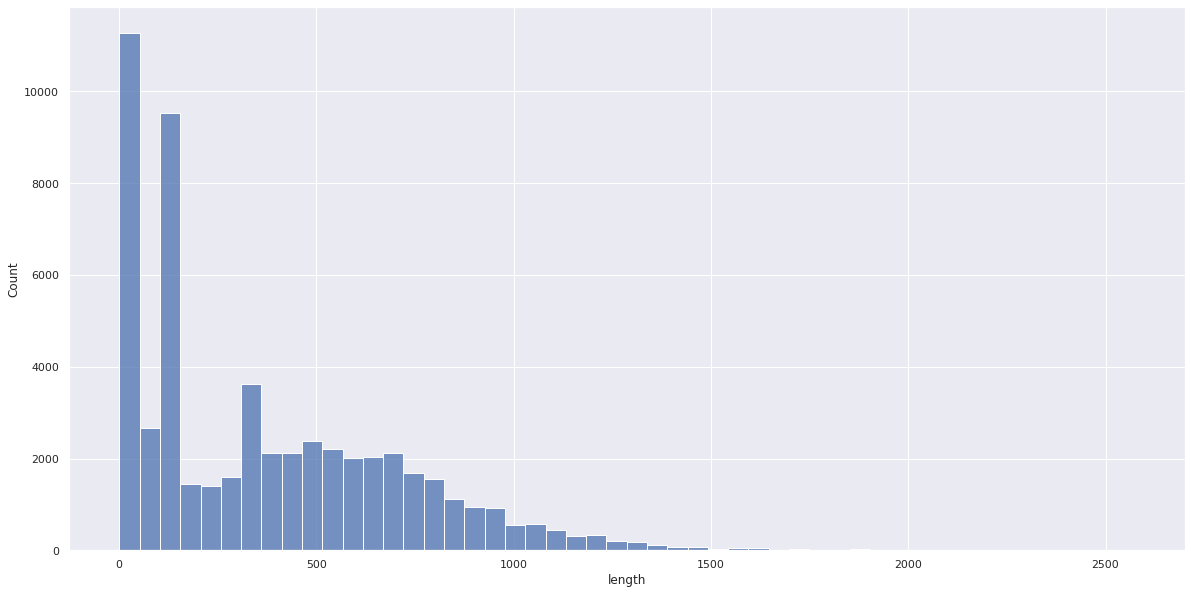

In [125]:
plt.rcParams['figure.figsize']=(20,10)
sns.histplot(df['length'],bins=50)

In [118]:
df[df['length']==2572]['news']

5    These "smart fabrics" have come about through ...
Name: news, dtype: object